# Data Exploration/Analysis for Probability Turnout Project

#### Set working directory & import datasets

In [307]:
import os
os.chdir("/Users/sejalgupta/Documents/BETO WORK/probability_turnout")
import pandas as pd
prior_elections = pd.read_csv("prior_elections.csv")
data18 = pd.read_csv("data18.csv")
data22 = pd.read_csv("data22.csv")
data22.head()

,County,Voters,Votes_Dem_Prim,Votes_Rep_Prim,White,Black or African American,American Indian and Alaska Native,Asian,Native Hawaiian Pacific Islander,Other Race,Median Income,Median Age,Sex Ratio
0,ANDERSON,29128.0,918.0,7081.0,41263,12114,237,350,9,3944,19168.0,39.3,157.6
1,ANDREWS,10212.0,88.0,2073.0,14810,418,0,57,26,2916,32217.0,32.3,98.4
2,ANGELINA,53073.0,1565.0,10149.0,67464,13194,270,968,5,5218,23878.0,37.6,95.7
3,ARANSAS,18239.0,659.0,4408.0,21282,79,218,275,0,2366,32050.0,50.0,98.1
4,ARCHER,6490.0,89.0,1920.0,8269,96,128,15,0,246,34557.0,44.2,100.6


In [308]:
prior_elections.head()

,County,Votes,Voters,Votes_Dem_Prim,Votes_Rep_Prim,White,Black or African American,American Indian and Alaska Native,Asian,Native Hawaiian Pacific Islander,Other Race,Median Income,Median Age,Sex Ratio
0,ANDERSON_10,10968,26768,1169,4516,42302,12507,379,307,64,2457,17465.0,38.5,148.8
1,ANDREWS_10,4053,8419,245,1261,11707,148,293,111,0,1789,29605.0,34.6,101.0
2,ANGELINA_10,19305,47667,3140,5053,65373,12996,299,599,22,5965,20104.0,35.7,95.6
3,ARANSAS_10,6895,15739,446,2471,21134,267,92,346,0,1408,25610.0,46.8,93.9
4,ARCHER_10,2865,6538,197,1187,8742,63,0,107,0,143,23882.0,41.4,102.8


## Playing with basic linear regressions

In [309]:
import numpy as np
from sklearn.linear_model import LinearRegression
data18.columns
X = data18[['Voters', 'Votes_Dem_Prim', 'Votes_Rep_Prim',
       'White', 'Black or African American',
       'American Indian and Alaska Native', 'Asian',
       'Native Hawaiian Pacific Islander', 'Other Race', 'Median Income',
       'Median Age', 'Sex Ratio']]
y = data18[["Votes"]]

In [310]:
#split into train and test, fit linear regression model
from sklearn.model_selection import train_test_split
for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
    linreg = LinearRegression()
    linreg.fit(X_train, y_train)
    print(linreg.score(X_test,y_test)) #very different in every run

0.9826045157836527
0.8589937120850119
0.9882271606304499
0.926338912782444
0.9691831013530395
0.9389006129513784
0.8972666635871224
0.84471716918718
0.985354489546814
0.9891378624417624


In [311]:
y_pred = linreg.predict(X_test) #why does this return negative values?
y_pred[:10] #see first ten values

array([[ 43551.27542332],
       [  7780.1085828 ],
       [  -666.93460779],
       [ 12807.72737123],
       [ -1677.0751133 ],
       [ 17267.36019146],
       [139586.01590831],
       [  7002.69423505],
       [ 31366.22150725],
       [ 19747.87107356]])

In [312]:
y_test[:10]

,Votes
122,53215
3,6070
34,1152
26,11883
50,362
110,13639
60,144010
111,7637
190,28217
18,21532


#### This returns negative values. Try scaling values first?

In [313]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
    pipe = make_pipeline(StandardScaler(), LinearRegression())
    pipe.fit(X_train, y_train)  # apply scaling on training data
    pipe.predict(X_test)
    print(pipe.score(X_test, y_test)) #these also vary a lot

0.9778963620129929
0.9823671910633318
0.9912195671616185
0.9517781737139865
0.9853487668124495
0.8880565936352721
0.9187988455790237
0.9823220634809678
0.9749861737231118
0.986366975694324


<p> Scaling does not seem to make much of a difference in r^2. Try scaling when predicting percentages? <p>

<p> Look at correlations <p>

In [314]:
import seaborn as sns
from matplotlib import pyplot as plt
#sns.pairplot(data18) #this doesnt show us a ton, it seems as though race data is more correlated, need to scale data`

<p> Trying Linear Regression with all years, not just 2018 <p>

In [315]:
X_all = prior_elections[['Voters', 'Votes_Dem_Prim', 'Votes_Rep_Prim',
       'White', 'Black or African American',
       'American Indian and Alaska Native', 'Asian',
       'Native Hawaiian Pacific Islander', 'Other Race', 'Median Income',
       'Median Age', 'Sex Ratio']]
y_all = prior_elections[["Votes"]]
for i in range(7):
    X_tr, X_tst, y_tr, y_tst = train_test_split(X_all, y_all, test_size = 0.2)
    lreg = LinearRegression()
    lreg.fit(X_tr, y_tr)
    print(lreg.score(X_tst,y_tst)) #very different in every run

0.9918660447982182
0.989513328183036
0.9922936777399789
0.991506894847111
0.9916266084855472
0.9913227086749844
0.9526482754570471


In [316]:
X_tr, X_tst, y_tr, y_tst = train_test_split(X_all, y_all, test_size = 0.2)
lreg = LinearRegression().fit(X_tr, y_tr)
prediction = lreg.predict(X_tst)
print(lreg.score(X_tst,y_tst))
prediction[:7]

0.9970161647454513


array([[-3758.73319122],
       [ 7277.75347973],
       [-1092.91772285],
       [ 7884.07289906],
       [16995.49341784],
       [20850.93198615],
       [ 7470.20873612]])

In [317]:
y_tst[:7]

,Votes
669,263
261,7182
262,1004
158,7155
488,17148
345,23240
541,6947


In [318]:
import numpy as np
X22 = data22[['Voters', 'Votes_Dem_Prim', 'Votes_Rep_Prim',
       'White', 'Black or African American',
       'American Indian and Alaska Native', 'Asian',
       'Native Hawaiian Pacific Islander', 'Other Race', 'Median Income',
       'Median Age', 'Sex Ratio']]
pred_votes = lreg.predict(X22)
#sum(pred_votes)
np.sum(pred_votes)

7073707.576359564

#### Do 100 trials. See average R^2 and average prediction

In [319]:
#Using only 2018 data to predict 2022 data
r_lr18 = []
pred_lr18 = []
for i in range(100):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
    lr18 = LinearRegression()
    lr18.fit(X_train, y_train)
    r_lr18.append(lr18.score(X_test,y_test))
    p = lr18.predict(X22)
    total = np.sum(p)
    pred_lr18.append(total) 
#sum of all counties predicted votes
print("Using 2018 data to predict 2022 VOTES")
print("Average R squared value of test data:", np.sum(r_lr18)/len(r_lr18))
print("Average prediction:", np.sum(pred_lr18)/len(r_lr18))

Using 2018 data to predict 2022 VOTES
Average R squared value of test data: 0.9415670613468282
Average prediction: 6966567.412556085


In [320]:
#Using 2010, 2014, and 2018 data to predict 2022 data
r_all = []
pred_all = []
for i in range(100):
    X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size = 0.2)
    lr_all = LinearRegression()
    lr_all.fit(X_train, y_train)
    r_all.append(lr_all.score(X_test,y_test))
    p = lr_all.predict(X22)
    total = np.sum(p)
    pred_all.append(total) 

#sum of all counties predicted votes
print("Using 2010, 2014, and 2018 data to predict 2022 VOTES")
print("Average R squared value of test data:", np.sum(r_all)/len(r_all))
print("Average prediction:", np.sum(pred_all)/len(r_all))

Using 2010, 2014, and 2018 data to predict 2022 VOTES
Average R squared value of test data: 0.9891494069769843
Average prediction: 7000896.589653982


In [321]:
#The same as above, w/ scaling
r_all = []
pred_all = []
for i in range(100):
    sclr = StandardScaler()
    lr_all = LinearRegression()
    
    #split & scale data
    X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size = 0.2)
    X_train = sclr.fit_transform(X_train)
    X_test = sclr.transform(X_test)
    X_pred = sclr.transform(X22)
    lr_all.fit(X_train, y_train)
    r_all.append(lr_all.score(X_test,y_test))
    
    #predictions
    p = lr_all.predict(X_pred)
    total = np.sum(p)
    pred_all.append(total) 

#sum of all counties predicted votes
print("Using 2010, 2014, and 2018 data to predict 2022 VOTES after Scaling ")
print("Average R squared value of test data:", np.sum(r_all)/len(r_all))
print("Average prediction:", np.sum(pred_all)/len(r_all))

Using 2010, 2014, and 2018 data to predict 2022 VOTES after Scaling 
Average R squared value of test data: 0.989716225600374
Average prediction: 7034274.007429548


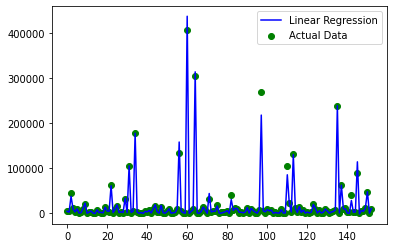

In [322]:
plt.plot(range(len(y_test)), lr_all.predict(X_test), label = "Linear Regression", color = "b")
plt.scatter(range(len(y_test)), y_test, label = "Actual Data", color = "g")
plt.legend()
plt.show()

### Instead of predicting votes, try predicting turnout %

In [323]:
#trying turnout percentage 
past_turnout = pd.read_csv(r'turnoutnum.csv')
pop22 = pd.read_csv(r'pop22.csv')
#past_turnout.columns
past_turnout.head()

,County,Turnout,Votes,Voters,Votes_Dem_Prim,Votes_Rep_Prim,White,Black or African American,American Indian and Alaska Native,Asian,Native Hawaiian Pacific Islander,Other Race,Median Income,Median Age,Sex Ratio
0,ANDERSON_10,0.4097,10968,26768,1169,4516,42302,12507,379,307,64,2457,17465.0,38.5,148.8
1,ANDREWS_10,0.4814,4053,8419,245,1261,11707,148,293,111,0,1789,29605.0,34.6,101.0
2,ANGELINA_10,0.4050,19305,47667,3140,5053,65373,12996,299,599,22,5965,20104.0,35.7,95.6
3,ARANSAS_10,0.4381,6895,15739,446,2471,21134,267,92,346,0,1408,25610.0,46.8,93.9
4,ARCHER_10,0.4382,2865,6538,197,1187,8742,63,0,107,0,143,23882.0,41.4,102.8


In [324]:
pop22.head()

,County,Voters,Votes_Dem_Prim,Votes_Rep_Prim,White,Black or African American,American Indian and Alaska Native,Asian,Native Hawaiian Pacific Islander,Other Race,Median Income,Median Age,Sex Ratio,Total population
0,ANDERSON,29128.0,918.0,7081.0,41263,12114,237,350,9,3944,19168.0,39.3,157.6,"57,917"
1,ANDREWS,10212.0,88.0,2073.0,14810,418,0,57,26,2916,32217.0,32.3,98.4,"18,227"
2,ANGELINA,53073.0,1565.0,10149.0,67464,13194,270,968,5,5218,23878.0,37.6,95.7,"87,119"
3,ARANSAS,18239.0,659.0,4408.0,21282,79,218,275,0,2366,32050.0,50.0,98.1,"24,220"
4,ARCHER,6490.0,89.0,1920.0,8269,96,128,15,0,246,34557.0,44.2,100.6,"8,754"


In [325]:
past_turnout_X = past_turnout[['Votes_Dem_Prim',
       'Votes_Rep_Prim', 'White', 'Black or African American',
       'American Indian and Alaska Native', 'Asian',
       'Native Hawaiian Pacific Islander', 'Other Race', 'Median Income',
       'Median Age', 'Sex Ratio']] #took out 'Voters', bc that could be really correlated w/ turnout %
past_turnout_Y = past_turnout[['Turnout']]
turnout_22X = pop22[['Votes_Dem_Prim',
       'Votes_Rep_Prim', 'White', 'Black or African American',
       'American Indian and Alaska Native', 'Asian',
       'Native Hawaiian Pacific Islander', 'Other Race', 'Median Income',
       'Median Age', 'Sex Ratio']]

In [326]:
#try predicting 2022 turnout (multiply by population to get results)

r = []
pred = []

for i in range(100):
    X_train, X_test, y_train, y_test = train_test_split(past_turnout_X, past_turnout_Y, test_size = 0.2)
    lr = LinearRegression()
    lr.fit(X_train, y_train)
    score = lr.score(X_test,y_test)
    r.append(score)
    percentages = lr.predict(turnout_22X)
    sum = 0
    for i in range(len(percentages)):
        sum += percentages[i] * pop22['Voters'][i]
    pred.append(sum)

#print(lr.predict(X_test))
print("Predicting Turnout Percentages")
print("Average R squared value of test data:", np.sum(r)/len(r))
print("Average prediction:", np.sum(pred)/len(pred))

Predicting Turnout Percentages
Average R squared value of test data: 0.33671349735854145
Average prediction: 6706094.223411109


In [327]:
#scaling & predicting turnout percentages
r_s = []
pred_s = []

for i in range(100):
    #initialize
    sclr = StandardScaler()
    lr = LinearRegression()
    #split & scale data
    X_train, X_test, y_train, y_test = train_test_split(past_turnout_X, past_turnout_Y, test_size = 0.2)
    X_train = sclr.fit_transform(X_train)
    X_test = sclr.transform(X_test)
    X_pred = sclr.transform(turnout_22X)
    #fit model
    lr.fit(X_train, y_train)
    score = lr.score(X_test,y_test) #lr.score is same as metrics r^2 score
    r_s.append(score)
    #prediction
    percentages = lr.predict(X_pred)
    sum = 0
    for i in range(len(percentages)):
        sum += percentages[i] * pop22['Voters'][i]
    pred_s.append(sum)

print("Predicting Turnout Percentages after Scaling Data")
print("Average R squared value of test data:", np.sum(r_s)/len(r_s))
print("Average prediction:", np.sum(pred_s)/len(pred_s))
#my r^2 is still low

Predicting Turnout Percentages after Scaling Data
Average R squared value of test data: 0.33023021786175144
Average prediction: 6704466.283402189


### Takeaways from Linear Regression: <br>
<p>
Scaling: did not make a difference when predicting with votes or turnout percentages.<br>
R^2 was high 90s when using 2010,2014,2018 and just 2018 data to predict votes. Oddly enough, some counties would show a predicted negative number of votes. This predicted around 7 million votes <br>
R^2 was low 30s when using 2010,2014,2018 data to predict turnout percentages. This predicted around 6.5 million votes. <p>

## Trying PCA & Random Forest Regression (will scale data first)

<p>  https://levelup.gitconnected.com/random-forest-regression-209c0f354c84 <p>

In [328]:
#split data into train and test

#taking out random state actually made my r^2 vals higher in first trial
X_train, X_test, y_train, y_test = train_test_split(past_turnout_X, past_turnout_Y, test_size = 0.2)
X_train.shape

(609, 11)

In [329]:
#normalize 

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [330]:
from sklearn.decomposition import PCA

pca = PCA() #did not specify # of components, so all will be returned
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [331]:
explained_variance = pca.explained_variance_ratio_
explained_variance #first two components responsible for 77% 

array([0.64832606, 0.1275179 , 0.08129058, 0.05944492, 0.03152684,
       0.02560725, 0.00907261, 0.0080749 , 0.0051132 , 0.00229043,
       0.0017353 ])

In [332]:
#random forest regression w pca of 3 components
pca3 = PCA(n_components = 3)
X_train_pca3 = pca3.fit_transform(X_train)
X_test_pca3 = pca3.transform(X_test)
print("Variance Ratio:", pca3.explained_variance_ratio_)

from sklearn.ensemble import RandomForestRegressor
#want to use randomforestregressor, not classifier, bc
#my y is numbers, not labels

classifier = RandomForestRegressor()
#classifier.fit(X_train_pca3, y_train)
#Got an error saying "A column-vector y was passed when a 1d array was expected. 
#Please change the shape of y to (n_samples,), for example using ravel()."
classifier.fit(X_train_pca3, y_train.values.ravel())

# Predicting the Test set results
y_pred = classifier.predict(X_test_pca3)

# Performance Evaluation <- doesn't support continous variables
#from sklearn.metrics import confusion_matrix
#from sklearn.metrics import accuracy_score
#cm = confusion_matrix(y_test, y_pred)
#print(cm)
#print('Accuracy' + accuracy_score(y_test, y_pred))

from sklearn.metrics import r2_score
r2_score(y_test, y_pred) #r2 of 29.7 is incredibly low

Variance Ratio: [0.64832606 0.1275179  0.08129058]


0.30137080324377674

In [333]:
#random forest regression w pca of 2 components
pca2 = PCA(n_components = 2)
X_train_pca2 = pca2.fit_transform(X_train)
X_test_pca2 = pca2.transform(X_test)
print("Variance Ratio:", pca2.explained_variance_ratio_)


classifier2 = RandomForestRegressor(random_state=0)
classifier2.fit(X_train_pca2, y_train.values.ravel())

# Predicting the Test set results
y_pred2 = classifier2.predict(X_test_pca2)

# Performance Evaluation <- doesn't support continous variables
from sklearn.metrics import r2_score
r2_score(y_test, y_pred2) #r2 of 23.6 is incredibly low

Variance Ratio: [0.64832606 0.1275179 ]


0.20955549535759455

In [334]:
#random forest regression w pca of 1 components
pca1 = PCA(n_components = 1)
X_train_pca1 = pca1.fit_transform(X_train)
X_test_pca1 = pca1.transform(X_test)
print("Variance Ratio:", pca1.explained_variance_ratio_)


classifier1 = RandomForestRegressor(random_state=0)
classifier1.fit(X_train_pca1, y_train.values.ravel())

# Predicting the Test set results
y_pred1 = classifier1.predict(X_test_pca1)

# Performance Evaluation <- doesn't support continous variables
from sklearn.metrics import r2_score
r2_score(y_test, y_pred1) #r2 is actually negative

Variance Ratio: [0.64832606]


-0.46865660527337805

In [335]:
X_train.shape

(609, 11)

In [336]:
X_train_pca.shape

(609, 11)

In [337]:
#all of my r^2 values when i use random forest regressor to 
#predict turnout % are really low

### theory: r^2 is lower predicting turnout compared to predicting votes

In [338]:
#redefine variables
X_all = prior_elections[['Voters', 'Votes_Dem_Prim', 'Votes_Rep_Prim',
       'White', 'Black or African American',
       'American Indian and Alaska Native', 'Asian',
       'Native Hawaiian Pacific Islander', 'Other Race', 'Median Income',
       'Median Age', 'Sex Ratio']]
y_all = prior_elections[["Votes"]]
X22 = data22[['Voters', 'Votes_Dem_Prim', 'Votes_Rep_Prim',
       'White', 'Black or African American',
       'American Indian and Alaska Native', 'Asian',
       'Native Hawaiian Pacific Islander', 'Other Race', 'Median Income',
       'Median Age', 'Sex Ratio']]

##find num of components to test with

#split & scale data
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size = 0.2)
sc1 = StandardScaler()
X_train = sc1.fit_transform(X_train)
X_test = sc1.transform(X_test)

#pca
pca = PCA() #did not specify # of components, so all will be returned
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
print(pca.explained_variance_ratio_) #use first two components

[6.82799137e-01 1.12749937e-01 7.51990758e-02 5.55672661e-02
 2.81135243e-02 2.10584630e-02 7.75349631e-03 6.40906346e-03
 5.81977186e-03 2.55660281e-03 1.43747509e-03 5.36187160e-04]


In [339]:
reg = RandomForestRegressor()
reg.fit(X_train, y_train.values.ravel())

# Predicting the Test set results
y_pred = reg.predict(X_test)

# Performance Evaluation 
from sklearn.metrics import r2_score
val = 0
for i in range(20):
    val += r2_score(y_test, y_pred) 
print(val/20) #average r2 is btwn 95-99, this is high

#why does predicting votes vs predicting turnout % make such a difference?

0.9497913117973557


In [340]:
#apply these predictions to 2022

#without scaling data
print("Without Scaling", np.sum(reg.predict(X22)))
    #this num is incredibly high, we must scale data

#scale data first
X22sc = sc1.transform(X22)
X22sc = pca.transform(X22sc)
print("With Scaling", np.sum(reg.predict(X22sc)))

Without Scaling 143402503.91
With Scaling 6044928.5


### Takeaways from PCA/Random Forest Regression <p> 
If you scale train/test data, scale the data you are predicting with <br>
For some reason, r^2 values a lot higher when predicting votes rather than turnout, even after scaling data. Not sure why this is happening. <p>

## Trying LASSO method

<p> https://towardsdatascience.com/ridge-and-lasso-regression-a-complete-guide-with-python-scikit-learn-e20e34bcbf0b "reduce model complexity and prevent over-fitting which may result from simple linear regression" <p>

In [341]:
#redefine variables 
past_turnout_X = past_turnout[['Votes_Dem_Prim',
       'Votes_Rep_Prim', 'White', 'Black or African American',
       'American Indian and Alaska Native', 'Asian',
       'Native Hawaiian Pacific Islander', 'Other Race', 'Median Income',
       'Median Age', 'Sex Ratio']] #took out 'Voters', bc that could be really correlated w/ turnout %
past_turnout_Y = past_turnout[['Turnout']]
turnout_22X = pop22[['Votes_Dem_Prim',
       'Votes_Rep_Prim', 'White', 'Black or African American',
       'American Indian and Alaska Native', 'Asian',
       'Native Hawaiian Pacific Islander', 'Other Race', 'Median Income',
       'Median Age', 'Sex Ratio']]

In [342]:
from sklearn.linear_model import Lasso

#gives us low r^2
X_train,X_test,y_train,y_test=train_test_split(past_turnout_X,past_turnout_Y, test_size=0.25)
lasso = Lasso()
lasso.fit(X_train,y_train)
train_score=lasso.score(X_train,y_train)
test_score=lasso.score(X_test,y_test)
coeff_used = np.sum(lasso.coef_!=0)
print("training r^2 score:", train_score) 
print("test r^2 score: ", test_score) 
print("number of features used: ", coeff_used) 

training r^2 score: 0.2666566305749888
test r^2 score:  0.3494802339623069
number of features used:  8


In [343]:
#come back to LASSO, first i want to just try logistic regression

In [344]:
#Predict # of votes w/o scaling
past_turnout_X = past_turnout[['Votes_Dem_Prim',
       'Votes_Rep_Prim', 'White', 'Black or African American',
       'American Indian and Alaska Native', 'Asian',
       'Native Hawaiian Pacific Islander', 'Other Race', 'Median Income',
       'Median Age', 'Sex Ratio']] #took out 'Voters', bc that could be really correlated w/ turnout %
past_turnout_Y = past_turnout[['Turnout']]
turnout_22X = pop22[['Votes_Dem_Prim',
       'Votes_Rep_Prim', 'White', 'Black or African American',
       'American Indian and Alaska Native', 'Asian',
       'Native Hawaiian Pacific Islander', 'Other Race', 'Median Income',
       'Median Age', 'Sex Ratio']]
X_train,X_test,y_train,y_test=train_test_split(past_turnout_X,past_turnout_Y, test_size=0.2)

#from sklearn.linear_model import LogisticRegression #import class
#lrr = LogisticRegression()
#lrr.fit(X_train,y_train)
#y_pred = lrr.predict(X_test)
#r2_score(y_test,y_pred)

#https://statisticsbyjim.com/regression/choosing-regression-analysis/
    #LOGISTIC REGRESSION CANNOT BE USED FOR CONTINOUS DEPENDENT VARIABLES

<p> <b> Note to self on accuracy score: </b> <br> 
    sklearn.metrics.r2_score is for regression/continous variables <br>
    sklearn.metrics.accuracy_score is for classification <p>

## Let's take a step back. Let's look at how our variables are correlated. 

In [345]:
past_turnout.head()

,County,Turnout,Votes,Voters,Votes_Dem_Prim,Votes_Rep_Prim,White,Black or African American,American Indian and Alaska Native,Asian,Native Hawaiian Pacific Islander,Other Race,Median Income,Median Age,Sex Ratio
0,ANDERSON_10,0.4097,10968,26768,1169,4516,42302,12507,379,307,64,2457,17465.0,38.5,148.8
1,ANDREWS_10,0.4814,4053,8419,245,1261,11707,148,293,111,0,1789,29605.0,34.6,101.0
2,ANGELINA_10,0.4050,19305,47667,3140,5053,65373,12996,299,599,22,5965,20104.0,35.7,95.6
3,ARANSAS_10,0.4381,6895,15739,446,2471,21134,267,92,346,0,1408,25610.0,46.8,93.9
4,ARCHER_10,0.4382,2865,6538,197,1187,8742,63,0,107,0,143,23882.0,41.4,102.8


In [346]:
print("Correlation with Median Age & Turnout", past_turnout["Median Age"].corr(past_turnout["Turnout"]))
print("Correlation with Median Age & Votes", past_turnout["Median Age"].corr(past_turnout["Votes"]))
#these are contradictory, but it makes sense to look at turnout, not votes
#bc votes is highly dependent on voters

Correlation with Median Age & Turnout 0.42191744389207153
Correlation with Median Age & Votes -0.20938529219431695


In [347]:
print("Correlation with Median Income & Turnout", past_turnout["Median Income"].corr(past_turnout["Turnout"]))
print("Correlation with Sex Ratio & Turnout", past_turnout["Sex Ratio"].corr(past_turnout["Turnout"]))
    #sex ratio is males per 100 females. a higher sex ratio = more males
    #because it's inversely correlated, more women --> more votes
    #very loose correlation, however

Correlation with Median Income & Turnout 0.5053400618243623
Correlation with Sex Ratio & Turnout -0.018898098214271762


In [348]:
#check how correlations are different with white & nonwhite populations
#make a nonwhite column
past_turnout["Nonwhite"] = past_turnout['Black or African American'] + past_turnout['American Indian and Alaska Native'] + past_turnout['Asian'] + past_turnout['Native Hawaiian Pacific Islander'] + past_turnout['Other Race']
past_turnout["Total Population"] = past_turnout["Nonwhite"] + past_turnout["White"]

#make white/nonwhite population in terms of whole popultion
past_turnout["White Ratio"] = past_turnout["White"]/past_turnout["Total Population"]
past_turnout["Nonwhite Ratio"] = past_turnout["Nonwhite"]/past_turnout["Total Population"]
print("Correlation with Nonwhite Population & Turnout", past_turnout["Nonwhite Ratio"].corr(past_turnout["Turnout"]))
print("Correlation with White Population & Turnout", past_turnout["White Ratio"].corr(past_turnout["Turnout"]))
#evidently, a higher nonwhite percentage leads to lower turnout, while a higher white percentage leads to higher turnout
#in the end, though, neither are really all that correlated

Correlation with Nonwhite Population & Turnout -0.10940891272409702
Correlation with White Population & Turnout 0.109408912724097


In [349]:
#let's look at primary engagement as a factor
past_turnout['Primary Turnout'] = (past_turnout['Votes_Dem_Prim'] + past_turnout['Votes_Rep_Prim'])/past_turnout['Voters']
print("Correlation with Primary Turnout & General Turnout", past_turnout["Primary Turnout"].corr(past_turnout["Turnout"]))
#the higher the primary turnout, the higher the actual turnout

Correlation with Primary Turnout & General Turnout 0.27941733606514146


In [350]:
print("Correlation with # of Registered Voters & General Turnout", past_turnout["Voters"].corr(past_turnout["Turnout"]))

Correlation with # of Registered Voters & General Turnout -0.022961667829335404


evidently, counties with older, richer populations are more likely to turnout. race, sex ratio, county size (# of registered voters) does not make much of a difference. 
larger primary turnout leads to slighty larger general turnout

In [351]:
#do linear regression but w only the more correlated factors
#primary turnout, median age, median income
#pull out variables & manually play with them
#can also try a thing where i add all their correlations 
#& give each factor a certain weight based off its weight in the
#overall correlation

In [352]:
#Linear Regression with median age, median income, & primary turnout
factors = [past_turnout["Median Age"], past_turnout["Median Income"], past_turnout["Primary Turnout"]]
#first, make sure no two variables are highly correlated
for i in factors:
    for j in factors:
        if i.equals(j) == False:
            a = i.corr(j)
            #print(a)
            if a > 0.7:
                print("Highly Correlated,", i[0], j[0])
            elif a > 0.5:
                print("Medium Correlated,", i[0], j[0])
#yay, none are actually correlated!

In [353]:
#set up variables
X_past = past_turnout[["Median Income", "Median Age", "Primary Turnout"]]
y_past = past_turnout["Turnout"]
X_22 = data22[['Median Income', 'Median Age']]
pd.options.mode.chained_assignment = None 
X_22["Primary Turnout"] = (data22['Votes_Dem_Prim'] + data22['Votes_Rep_Prim'])/data22['Voters']
X_22.head()
#X_past.head()

,Median Income,Median Age,Primary Turnout
0,19168.0,39.3,0.274615
1,32217.0,32.3,0.211614
2,23878.0,37.6,0.220715
3,32050.0,50.0,0.277811
4,34557.0,44.2,0.309553


In [354]:
#first, try linear regression + pull out their weights

import warnings
warnings.filterwarnings('ignore')

#unscaled version
average_r = 0
trials = 100
for i in range(trials):
    lr_un = LinearRegression()
    X_train, X_test, y_train, y_test = train_test_split(X_past, y_past, test_size = 0.2)
    lr_un.fit(X_train.values, y_train)
    average_r += lr_un.score(X_test.values,y_test)
    pred = lr_un.predict(X_22)
    #print(lr_un.coef_)
average_r = average_r/trials
print("Unscaled: ", average_r)
#average r of .3735

#scaled version
average_r = 0
trials = 100
for i in range(trials):
    sclr = StandardScaler()
    lr_sc = LinearRegression()
    X_train, X_test, y_train, y_test = train_test_split(X_past, y_past, test_size = 0.2)
    X_train1 = sclr.fit_transform(X_train)
    X_test1 = sclr.transform(X_test)
    X_221 = sclr.transform(X_22)
    lr_sc.fit(X_train1, y_train)
    average_r += lr_sc.score(X_test1,y_test)
    pred = lr_sc.predict(X_221)
average_r = average_r/trials
print("Scaled: ", average_r)
#average r of .3761

Unscaled:  0.3810494168712784
Scaled:  0.3744494237341383


In [355]:
#i will use the scaled version and pull out the weights of Median Income, Median Age, and Primary Turnout
#ls = lr_sc.coef_
#ls.sum() #these coeff only add to .091

#finding the average weight
med_income, med_age, prim_turn, coeff_sum = 0, 0, 0, 0
factors = [med_income, med_age, prim_turn, coeff_sum]
trials = 100
for i in range(trials):
    sclr = StandardScaler()
    lr_sc = LinearRegression()
    X_train, X_test, y_train, y_test = train_test_split(X_past, y_past, test_size = 0.2)
    X_train = sclr.fit_transform(X_train)
    X_test = sclr.transform(X_test)
    X_22 = sclr.transform(X_22)
    lr_sc.fit(X_train, y_train)
    ls = lr_sc.coef_
    med_income += ls[0]
    med_age += ls[1]
    prim_turn += ls[2]
    coeff_sum += ls.sum()
med_income = med_income/trials
med_age = med_age/trials
prim_turn = prim_turn/trials
coeff_sum_av = coeff_sum/trials
print("Med Income Average Coeff", med_income)
print("Med Age Average Coeff", med_age)
print("Primary Turnout Average Coeff", prim_turn)
print("Average Coeff Sum", coeff_sum_av)

Med Income Average Coeff 0.047332540834238976
Med Age Average Coeff 0.024413692063940763
Primary Turnout Average Coeff 0.0219334839637896
Average Coeff Sum 0.09367971686196935


In [356]:
total = med_income + med_age + prim_turn
med_income_w = med_income/total
med_age_w = med_age/total
prim_turn_w = prim_turn/total
print("Med Income Weight", med_income_w)
print("Med Age Weight", med_age_w)
print("Prim Turnout Weight", prim_turn_w)

Med Income Weight 0.5052592217371903
Med Age Weight 0.26060808979506916
Prim Turnout Weight 0.23413268846774044


In [357]:
#how do those weights compare to their correlation
med_income_corr = past_turnout["Median Income"].corr(past_turnout["Turnout"])
med_age_corr = past_turnout["Median Age"].corr(past_turnout["Turnout"])
prim_turn_corr = past_turnout["Primary Turnout"].corr(past_turnout["Turnout"])
corr_total = med_income_corr + med_age_corr + prim_turn_corr
med_income_corr_w = med_income_corr/corr_total
med_age_corr_w = med_age_corr/corr_total
prim_turn_corr_w = prim_turn_corr/corr_total
print("Med Income Weight", med_income_corr_w)
print("Med Age Weight", med_age_corr_w)
print("Prim Turnout Weight", prim_turn_corr_w)
#it seems as those age matters more and income matters less, while primary turnout stays the same

Med Income Weight 0.4187872692184924
Med Age Weight 0.3496529713581651
Prim Turnout Weight 0.2315597594233425


In [359]:
#since the sum of coeff is equal to 0.093, make my new correlation weights sized to that
med_income_corr_w = med_income_corr_w * coeff_sum_av
med_age_corr_w = med_age_corr_w * coeff_sum_av
prim_turn_corr_w = prim_turn_corr_w * coeff_sum_av

0.021692452699404466

In [ ]:
#now that i have new coefficients, lets try a lin reg model

#how to do linear reg but you choose the weights?